# Life Expectancy by sex between 2000 and 2021 in Kenya (WHO)

Plot showing the life expectancy using data from the World Health
Organization (WHO) between 2000 and 2021 in Kenya.

Kabui, Charles  
2025-03-10

 *** 
[Read at <u>**ToKnow**</u>.ai](https://toknow.ai/posts/kenya-life-expectancy-between-2000-and-2021/index.html) -- [Download as Notebook](https://toknow.ai/posts/kenya-life-expectancy-between-2000-and-2021/index.output.ipynb) -- [Download as PDF](https://toknow.ai/posts/kenya-life-expectancy-between-2000-and-2021/index.pdf)
 *** 

#### Imports

In [5]:
import pandas as pd
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns

def plot_who_data(
        raw_data: pd.DataFrame, 
        title: str, 
        year_col = "Year", 
        value_col = "Value", 
        pivot_columns = "Sex", 
        pivot_data_columns = [
            {
                "name": "TOTAL",
                "options": {
                    'marker': 'o',
                    'linewidth': 2,
                    'color': 'purple'
                }
            },
            {
                "name": "MALE",
                "options": {
                    'marker': 's',
                    'linewidth': 2,
                    'color': 'blue'
                }
            },
            {
                "name": "FEMALE",
                "options": {
                    'marker': '^',
                    'linewidth': 2,
                    'color': 'pink'
                }
            },
        ]):
    data = raw_data.copy()
    # Convert Year to numeric and Value to float
    data[year_col] = pd.to_numeric(data[year_col])
    data[value_col] = pd.to_numeric(data[value_col])
    # Pivot the data to have columns for each sex category
    pivot_data = data.pivot_table(index=year_col, columns=pivot_columns, values=value_col)
    # Set the style
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12, 6))
    # Plot the data
    for column in pivot_data_columns:
        sex = column['name']
        ax.plot(pivot_data.index, pivot_data[sex], label=sex, **column['options'])
    # Add title and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(year_col, fontsize=12)
    ax.set_ylabel(value_col, fontsize=12)
    ax.legend(title=pivot_columns)
    ax.grid(True, alpha=0.3)
    # Add some annotations - show max and min values
    for sex in pivot_data.columns:
        max_year = pivot_data[sex].idxmax()
        max_val = pivot_data[sex].max()
        ax.annotate(f"max: {max_val:.1f}", 
                    xy=(max_year, max_val),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9)
    # Adjust the layout
    fig.tight_layout()
    # Add data source note
    fig.text(0.1, 0.01, "Data Source: WHO Xmart API", fontsize=8, style='italic')
    # Add a watermark to the center of the plot
    ax.text(0.95, 0.02, 'ToKnow.ai', ha='right', va='bottom', 
        fontsize=18, color='gray', alpha=0.5, transform=ax.transAxes, rotation=45)

def url_encode(url):
    return urllib.parse.quote(url, safe=":/?&=$")

### Life expectancy, Kenya

The average number of years that a newborn could expect to live. Kenya,
by sex, 2000 - 2021.

In [6]:
life_expectancy_filter = "IND_ID eq '90E2E48WHOSIS_000001' and GEO_NAME_SHORT eq 'Kenya'"
life_expectancy_select = "DIM_GEO_CODE_M49, GEO_NAME_SHORT, DIM_TIME, IND_NAME, DIM_SEX, AMOUNT_N"
life_expectancy_data = pd.read_csv(url_encode(
    f"https://xmart-api-public.who.int/DATA_/RELAY_WHS?$filter={life_expectancy_filter}&$select={life_expectancy_select}&$format=csv"),
    names=[
        "Country Code",
        "Country",
        "Year",
        "Indicator",
        "Sex",
        "Life expectancy (at birth)"
    ],
    header=1)

life_expectancy_data

65 rows × 6 columns

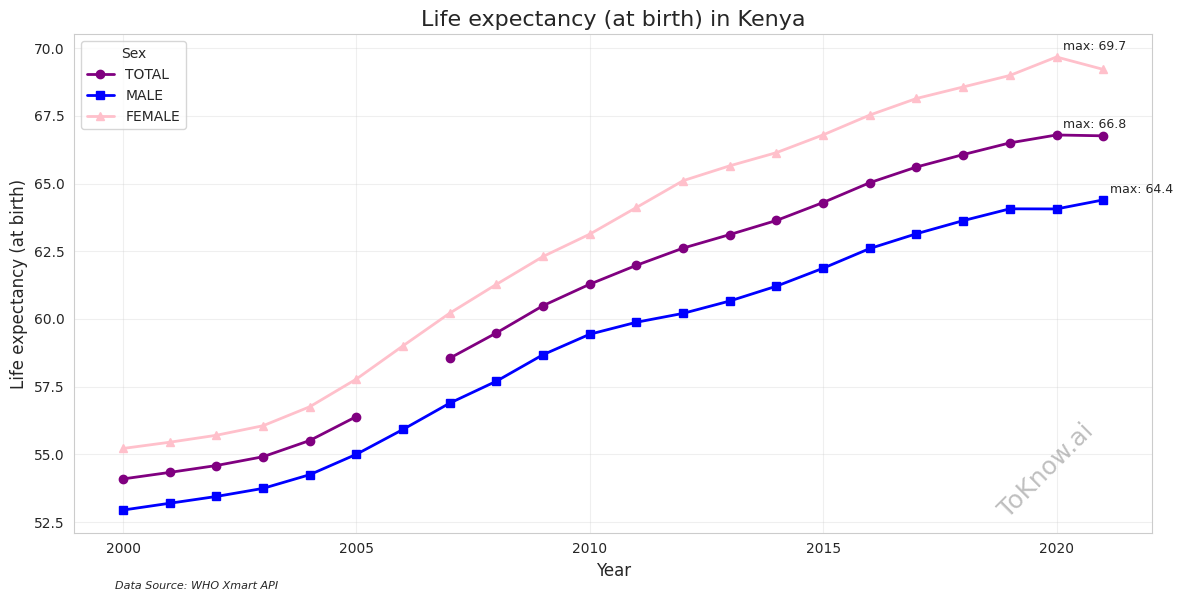

In [7]:
plot_who_data(
    life_expectancy_data, 
    "Life expectancy (at birth) in Kenya", 
    value_col="Life expectancy (at birth)")

Summary Statistics

In [8]:
life_expectancy_data.pivot_table(
    index="Year", 
    columns="Sex", 
    values="Life expectancy (at birth)").describe()

### Healthy life expectancy (HALE) at birth

The average number of years that a person can expect to live in “full
health” from birth. Kenya, by sex, 2000 - 2021.

In [9]:
healthy_life_expectancy_filter = "IND_ID eq 'C64284DWHOSIS_000002' and GEO_NAME_SHORT eq 'Kenya'"
healthy_life_expectancy_select = "DIM_GEO_CODE_M49, GEO_NAME_SHORT, DIM_TIME, IND_NAME, DIM_SEX, AMOUNT_N"
healthy_life_expectancy_data = pd.read_csv(url_encode(
    f"https://xmart-api-public.who.int/DATA_/RELAY_WHS?$filter={life_expectancy_filter}&$select={life_expectancy_select}&$format=csv"),
    names=[
        "Country Code",
        "Country",
        "Year",
        "Indicator",
        "Sex",
        "Healthy life expectancy (at birth)"
    ],
    header=1)

healthy_life_expectancy_data

65 rows × 6 columns

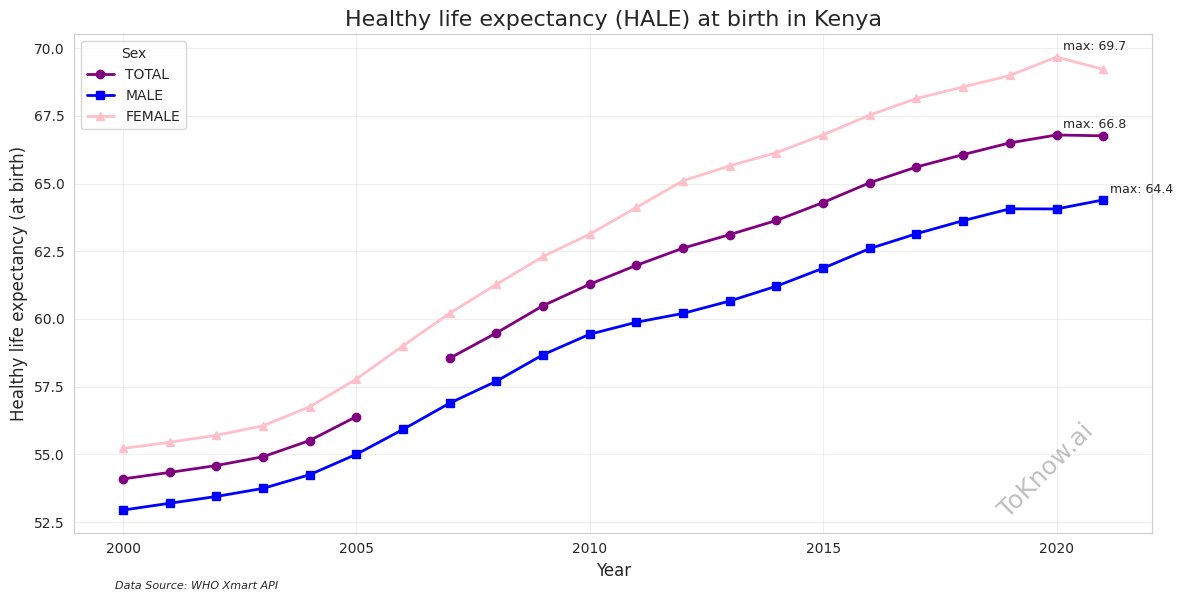

In [10]:
plot_who_data(
    healthy_life_expectancy_data, 
    "Healthy life expectancy (HALE) at birth in Kenya", 
    value_col="Healthy life expectancy (at birth)")

Summary Statistics

In [11]:
healthy_life_expectancy_data.pivot_table(
    index="Year", 
    columns="Sex", 
    values="Healthy life expectancy (at birth)").describe()

### References

Source: [World Health Organization
(WHO)](https://data.who.int/countries/404)

------------------------------------------------------------------------

***Disclaimer:*** *For information only. Accuracy or completeness not
guaranteed. Illegal use prohibited. Not professional advice or
solicitation.* ***Read more:
[/terms-of-service](https://toknow.ai/terms-of-service)***